<b>PART 01:</b>Reading and Displaying videos

In [0]:
import numpy as np 
import cv2 
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('kntu-computer.avi')
 
while True:
  ret, I = cap.read()

  if ret == False:
    break

  cv2_imshow(I)

  key = cv2.waitKey(33)

  if key == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

the above code oppens a short video clip and displayes it.

*****

<b>Writing the video on the disk</b>

In [0]:
import numpy as np
import cv2

cap = cv2.VideoCapture('eggs.avi')

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter('eggs-reverse.avi',fourcc, 30.0, (w,h))

while True:
    ret, I = cap.read()

    if ret == False:
        break

    out.write(I)

cap.release()
out.release()


the above code reads a video named 'eggs.avi' and saves the frames into another video file named 'eggs-reverse.avi'

***

<b><i>TASK 01:</i></b><br>
change the above file so that video frames are saved in reverse order. Therfore, in the end, the file 'eggs-reverse.avi' should be a backward playback of 'eggs.avi'.

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture('eggs.avi')

check, vid = cap.read()
counter = 0
check = True
frame_list = []

while(check == True):
  cv2.imwrite("frame%d.jpg"%counter,vid)
  check, vid = cap.read()
  frame_list.append(vid)
  counter+=1
  frame_list.pop()

  for frame in frame_list:
    cv2_imshow("Frame", frame)

    if cv2.waitKey(25) and 0xFF == ord("q"):
      break
  
  cap.release()
  cv2.destroyAllWindows()
  frame_list.reverse()

  for frame in frame_list:
    cv2_imshow("Frame", frame)
    if cv2.waitKey(25) and 0xFF == ord("q"):
      break

  cap.release()
  cv2.destroyAllWindows()


we have used python lists for buffering the frames.

*****

<b>PART 02:</b>Histograms

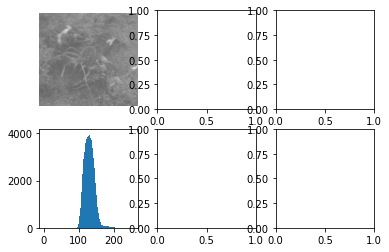

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fname = 'crayfish.jpg'

I = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

f, axes = plt.subplots(2, 3)

axes[0,0].imshow(I, 'gray', vmin=0, vmax=255)
axes[0,0].axis('off')

axes[1,0].hist(I.ravel(),256,[0,256]);

plt.show()




in the above code we use matplotlib to plot histograms.<br>
"plt.subplots(2,3)" creates a 2 by 3 array of subplots.

***

<b><i>TASK 02:</i><b><br>
<i>a)</i> We want to linearly expand the histogram to get a better contrast. Determine points a and b for linear histogram expansion.<br>
then create an image J in which the histogram has been expanded.<br>
plot the image J and its histogram in the second column of the subplots.

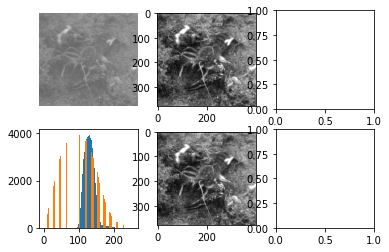

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fname = 'crayfish.jpg'

I = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

a = 100.0
b = 175.0

J = (I-a)*255.0/(b-a)
J[J < 0] = 0
J[J > 255] = 255
J = J.astype(np.uint8)

f, axes = plt.subplots(2, 3)

axes[0,0].imshow(I, 'gray', vmin=0, vmax=255)
axes[0,0].axis('off')

axes[1,0].hist(I.ravel(),256,[0,256]);

axes[0,1].imshow(J, 'gray', vmin=0, vmax=255)
axes[1,1].imshow(J, 'gray', vmin=0, vmax=255)
axes[0,0].axis('off')

axes[1,0].hist(J.ravel(),256,[0,256]);

plt.show()



<i>b)</i> plot the image K and its histogram in the third column of the subplots.

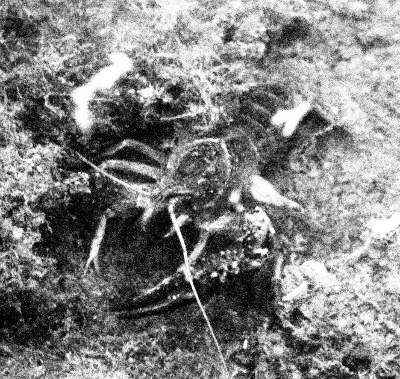

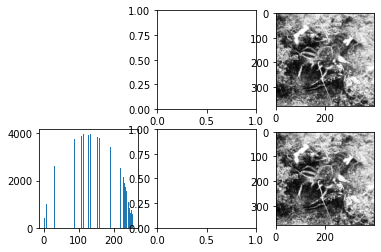

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

fname = 'crayfish.jpg'

I = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

K = cv2.equalizeHist(I)
cv2_imshow(K)

f, axes = plt.subplots(2, 3)

axes[0,2].imshow(K, 'gray', vmin=0, vmax=255)
axes[1,2].imshow(K, 'gray', vmin=0, vmax=255)
axes[0,0].axis('off')

axes[1,0].hist(K.ravel(),256,[0,256]);

plt.show()